# Projeto de Análise de Aplicativos da Google Play Store

# Importando bibliotecas necessárias

In [234]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date

 # Carregamos o conjunto de dados do Google Play Store

In [235]:
# Carregando o dataset
df_app = pd.read_csv('googleplaystore.csv')


# Realizamos uma visualização inicial das cinco primeiras linhas para entender a estrutura dos dados.

In [236]:
# Primeiras 5 linhas:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Manipulação de dados

### Removendo valores não compatíveis com o formato de data

In [237]:
df_app = df_app[df_app['Last Updated'].str.match('\D')]

### Convertendo a coluna 'Last_Updated' para o formato de data

In [238]:
df_app['Last Updated'] = pd.to_datetime(df_app['Last Updated'])

### Remover símbolos não numéricos e converter para inteiro

In [239]:
df_app['Installs'] = df_app['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

### Criando uma nova coluna 'Last_Updated_Days' para representar a diferença entre a última atualização e hoje

In [240]:
df_app['Last Updated_Days'] = (pd.to_datetime('today') - df_app['Last Updated']).dt.days

### Extraindo a versão mínima do Android

In [241]:
df_app['Android Ver'] = df_app['Android Ver'].apply(lambda x: str(x).split(' and ')[0].split(' - ')[0])
df_app['Android Ver'] = df_app['Android Ver'].replace('4.4W', '4.4')

### Removendo colunas irrelevantes

In [242]:
def remove_features(lista_features):
    for i in lista_features:
        df_app.drop(i, axis=1, inplace=True)

remove_features(['Current Ver'])

### Removendo valores faltantes

In [243]:
df_app.dropna(axis=0, how='any', inplace=True)

# Análise Exploratória dos Dados (EDA)

### Insight 1: Categorias mais populares (maior número de aplicativos)

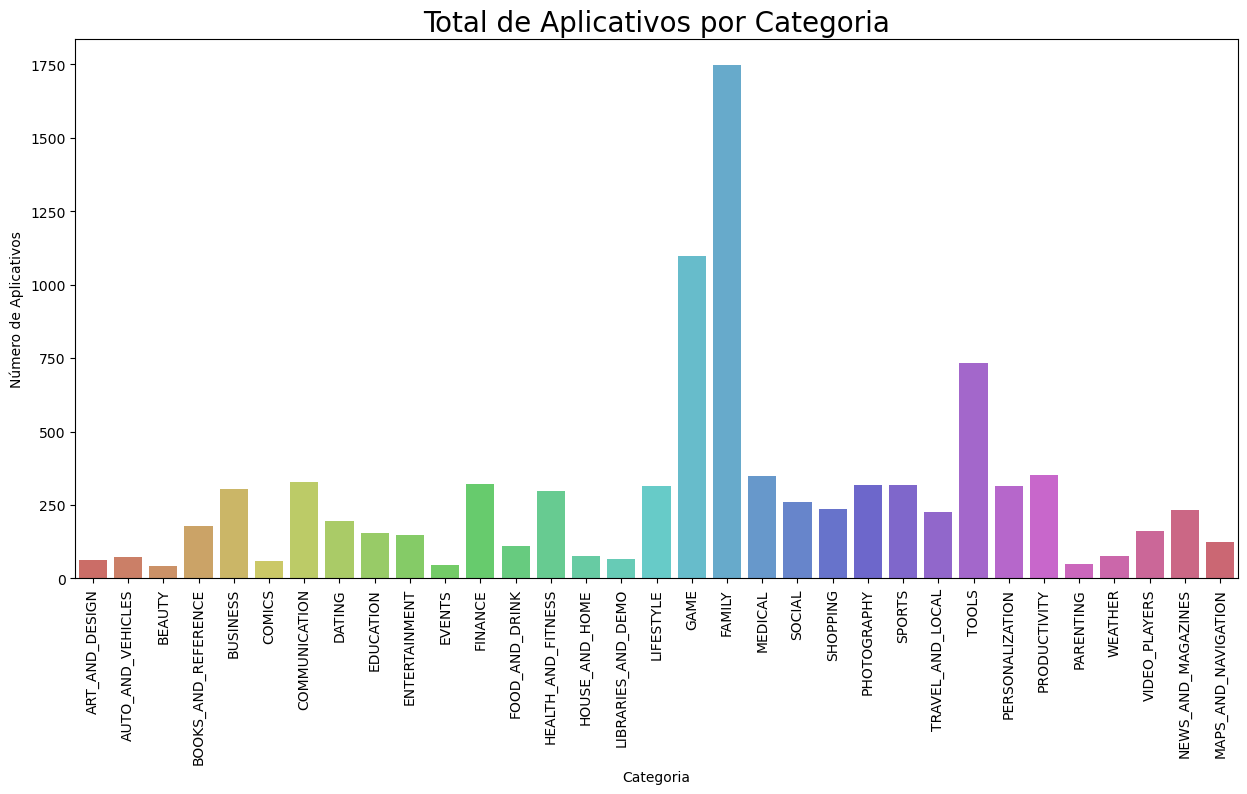

In [244]:
plt.figure(figsize=(15, 7))
fig = sns.countplot(x=df_app['Category'], palette='hls')
plt.xlabel('Categoria')
plt.ylabel('Número de Aplicativos')
plt.title('Total de Aplicativos por Categoria', size=20)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

### Insight 2: Distribuição dos Downloads

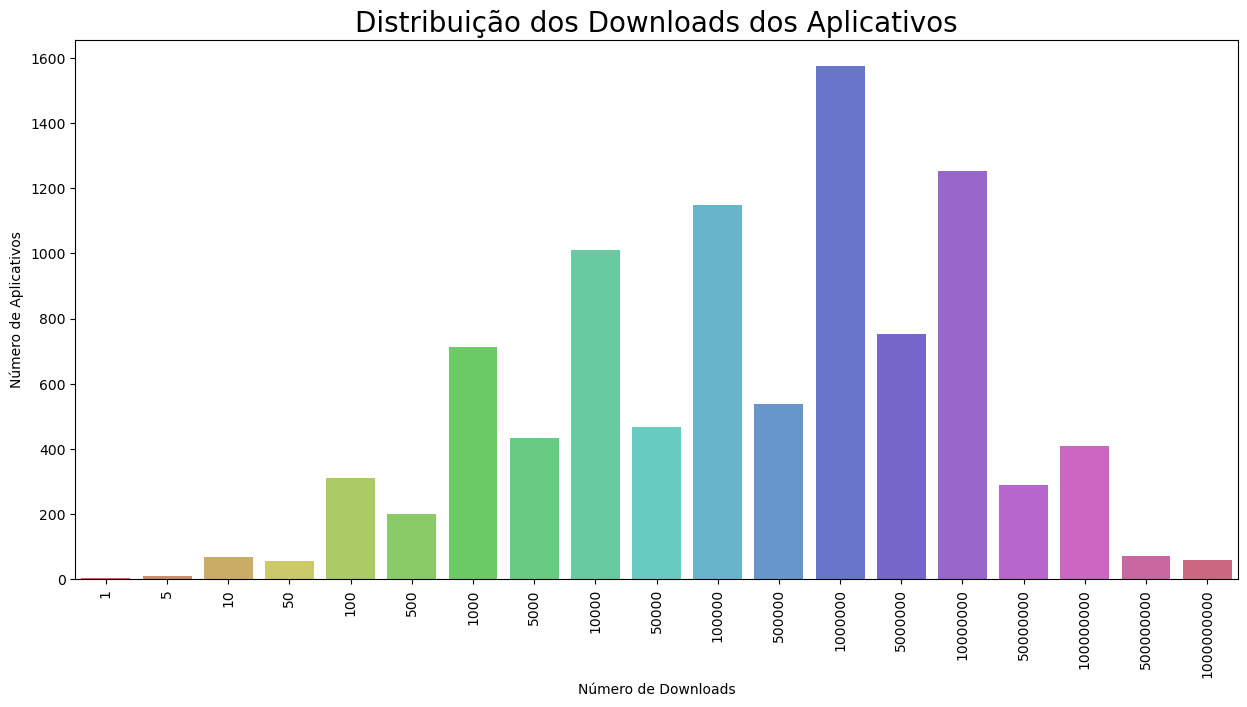

In [245]:
plt.figure(figsize=(15, 7))
fig = sns.countplot(x=df_app['Installs'], palette='hls')
plt.xlabel('Número de Downloads')
plt.ylabel('Número de Aplicativos')
plt.title('Distribuição dos Downloads dos Aplicativos', size=20)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

### Insight 3: Distribuição dos Downloads por categoria

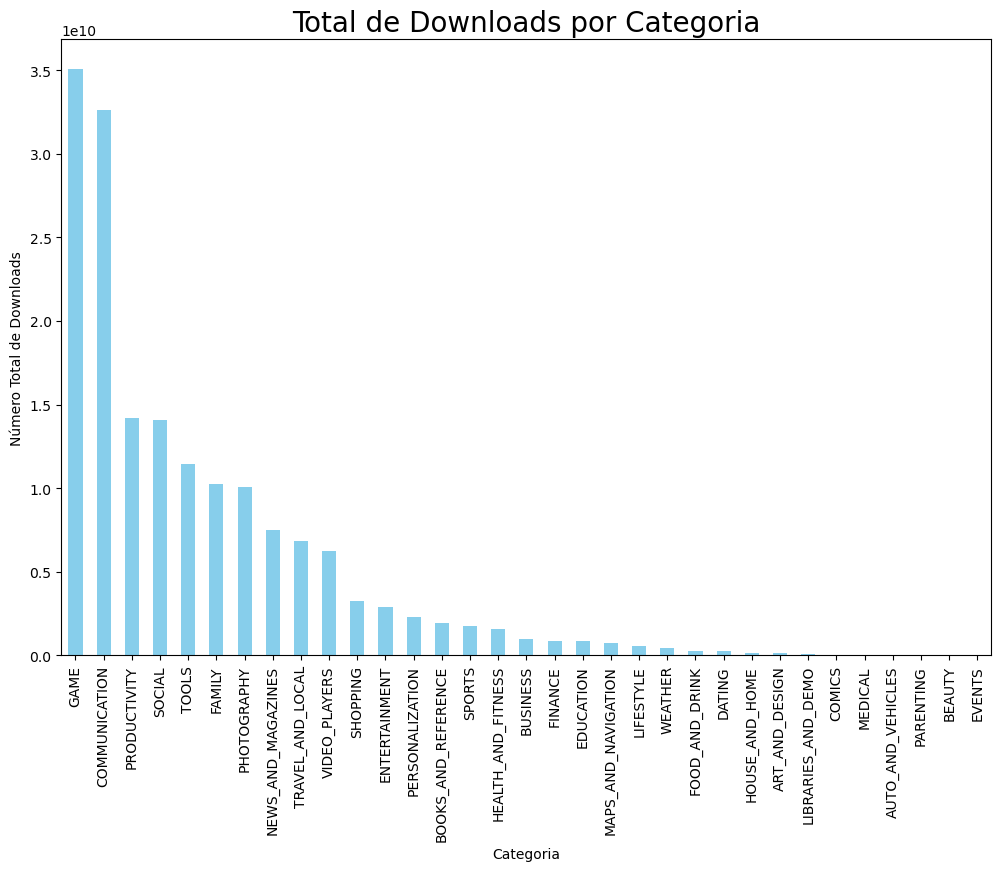

In [246]:
# Agrupar o DataFrame por categoria e calcular a soma dos downloads em cada categoria
category_installs = df_app.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Criar gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
category_installs.plot(kind='bar', color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Número Total de Downloads')
plt.title('Total de Downloads por Categoria', size=20)
plt.show()

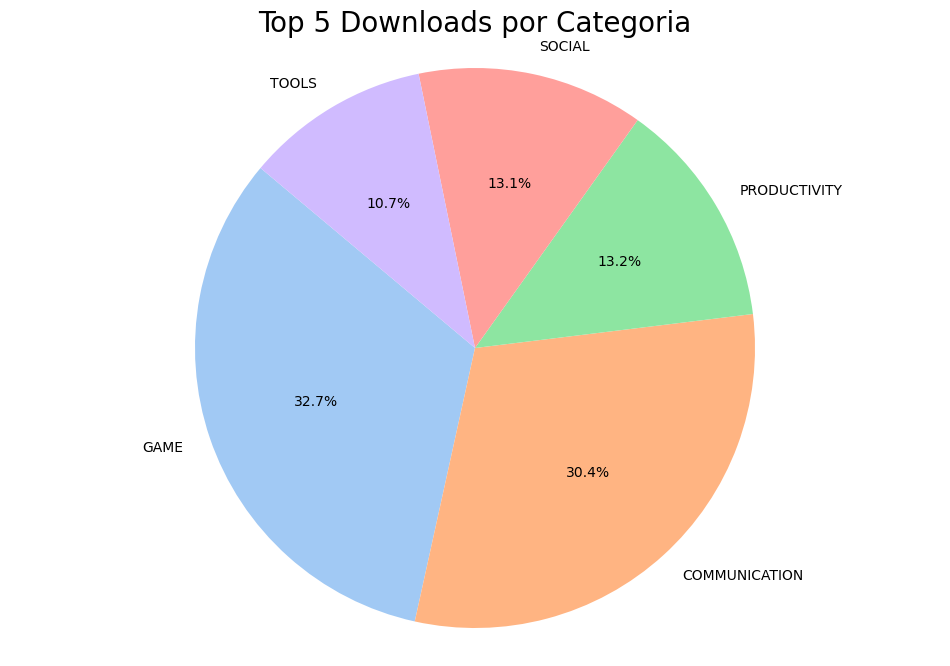

In [247]:
# Agrupar o DataFrame por categoria e calcular a soma dos downloads em cada categoria
top_15_category_installs = category_installs.head(5)

# Criar gráfico de pizza
plt.figure(figsize=(12, 8))
plt.pie(top_15_category_installs, labels=top_15_category_installs.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Downloads por Categoria', size=20)
plt.show()

### Insight 4: Distribuição dos Downloads por categoria (App Pagos)

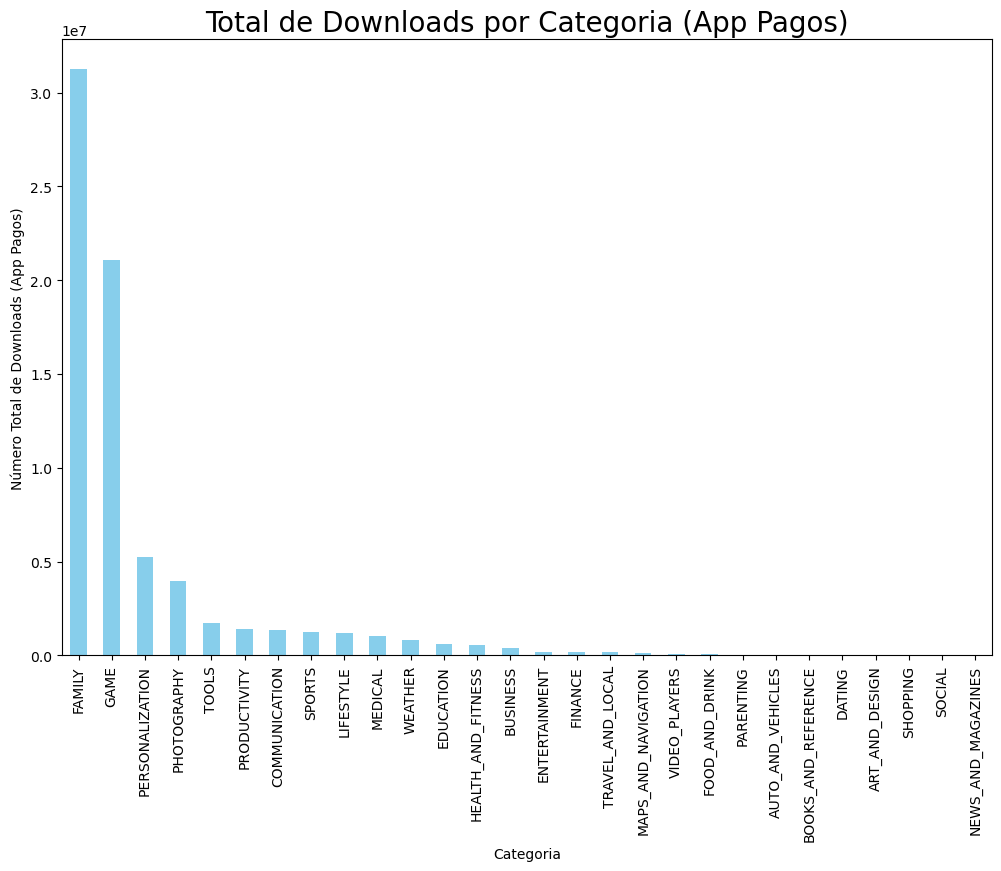

In [248]:
# Filtrar apenas aplicativos pagos
paid_apps = df_app[df_app['Type'] == 'Paid']

# Agrupar o DataFrame filtrado por categoria e calcular a soma dos downloads em cada categoria
category_installs_paid = paid_apps.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Criar gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
category_installs_paid.plot(kind='bar', color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Número Total de Downloads (App Pagos)')
plt.title('Total de Downloads por Categoria (App Pagos)', size=20)
plt.show()

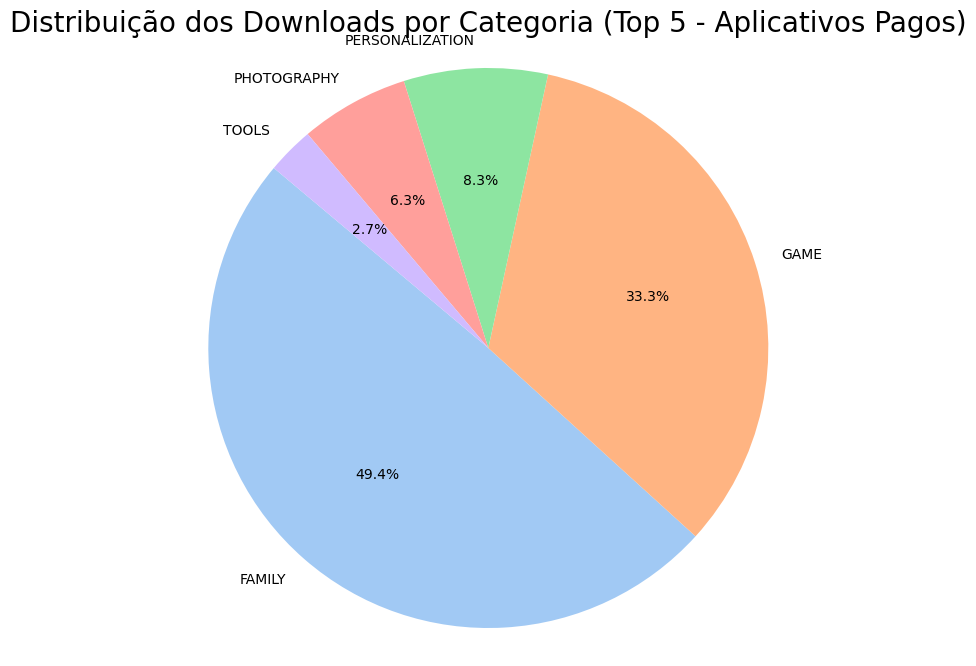

In [249]:
# Filtrar apenas aplicativos pagos
paid_apps = df_app[df_app['Type'] == 'Paid']

# Agrupar o DataFrame filtrado por categoria e calcular a soma dos downloads em cada categoria
category_installs_paid = paid_apps.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Selecionar as top 5 categorias com mais downloads
top_5_category_installs_paid = category_installs_paid.head(5)

# Criar gráfico de pizza
plt.figure(figsize=(12, 8))
plt.pie(top_5_category_installs_paid, labels=top_5_category_installs_paid.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribuição dos Downloads por Categoria (Top 5 - Aplicativos Pagos)', size=20)
plt.show()

### Insight 5: Distribuição entre app Gratuitos e Pagos

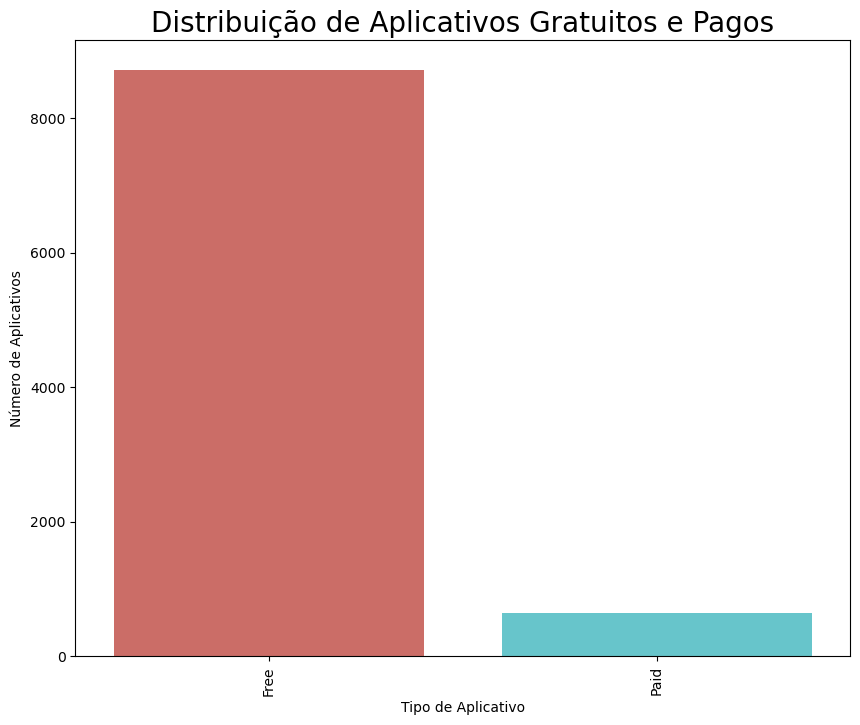

In [250]:
# Insight 6: Distribuição de Aplicativos Gratuitos e Pagos
plt.figure(figsize=(10, 8))
fig = sns.countplot(x=df_app['Type'], palette='hls')
plt.xlabel('Tipo de Aplicativo')
plt.ylabel('Número de Aplicativos')
plt.title('Distribuição de Aplicativos Gratuitos e Pagos', size=20)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

### Insight 5: Distribuição de Valores dos app pagos por categoria 

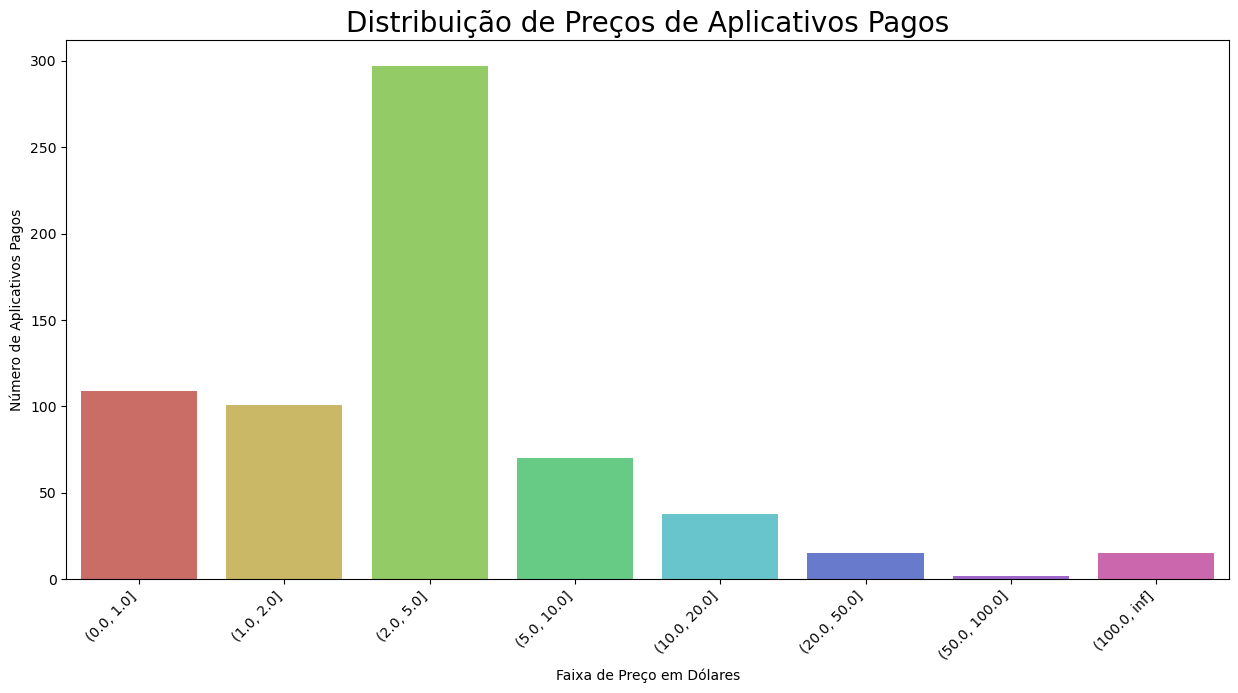

In [251]:
# Filtrar valores não nulos e diferentes de 'Free' e criar uma cópia
price_app = df_app[(df_app['Type'] == 'Paid') & (df_app['Price'] != 'Free')].copy()

# Converter a coluna 'Price' para tipo numérico
price_app['Price'] = price_app['Price'].apply(lambda x: float(x.replace('$', '')))

# Criar faixas de preço
price_app['Price_Category'] = pd.cut(price_app['Price'], bins=[0, 1, 2, 5, 10, 20, 50, 100, float('inf')])

# Criar gráfico de contagem
plt.figure(figsize=(15, 7))
price_plot = sns.countplot(x='Price_Category', palette='hls', data=price_app)
plt.xlabel('Faixa de Preço em Dólares')
plt.ylabel('Número de Aplicativos Pagos')
plt.title('Distribuição de Preços de Aplicativos Pagos', size=20)
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Insight 6: Distribuição de Classificações de Aplicativos

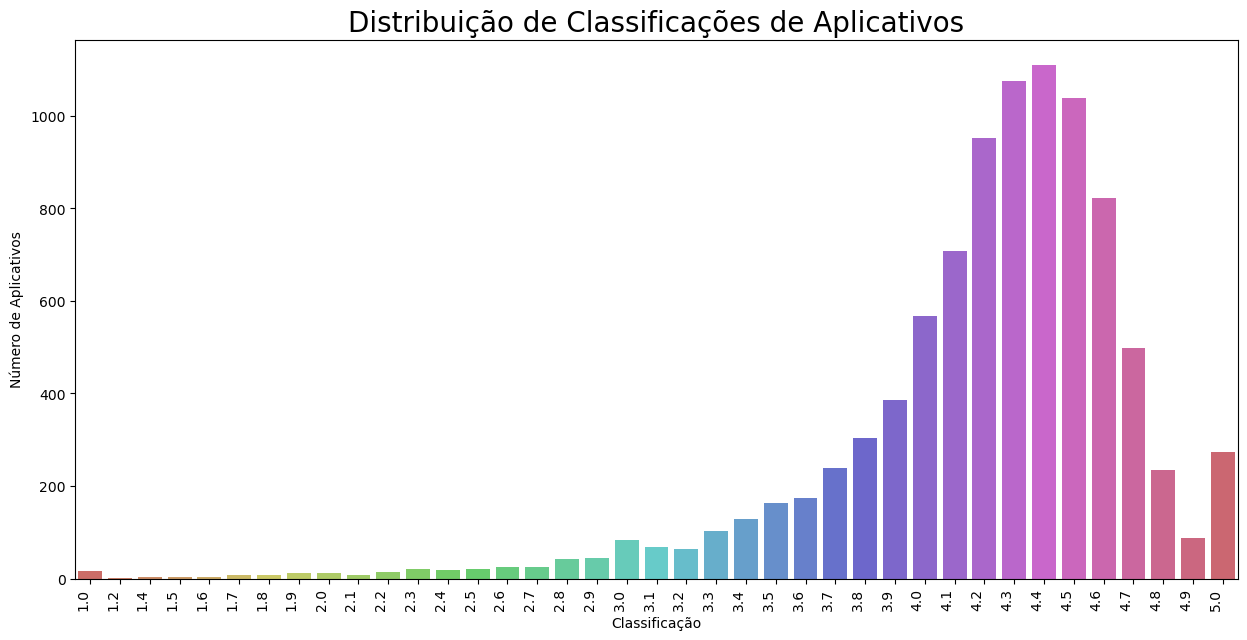

In [252]:
# Insight 8: Distribuição de Classificações
plt.figure(figsize=(15, 7))
ratings = sns.countplot(x='Rating', data=df_app, palette='hls')
ratings.set_xticklabels(ratings.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Classificação')
plt.ylabel('Número de Aplicativos')
plt.title('Distribuição de Classificações de Aplicativos', size=20)
plt.show()

### Insight 7: Correlação de Downloads com Avaliação

          Installs    Rating
Installs  1.000000  0.051355
Rating    0.051355  1.000000


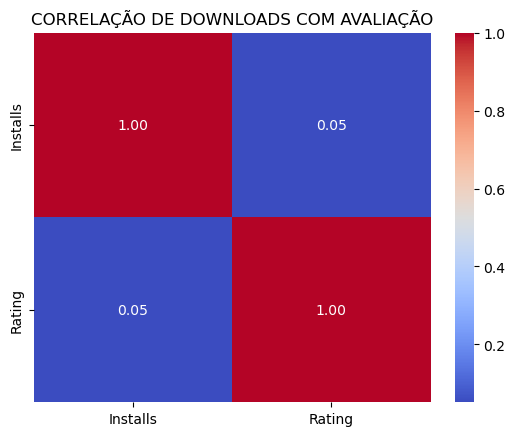

In [253]:
correlacao = df_app[['Installs','Rating']].corr()
print(correlacao)
plt.title('CORRELAÇÃO DE DOWNLOADS COM AVALIAÇÃO')
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()